In [1]:
import pandas as pd
data = pd.read_csv("./Datasets/Twitter_Data.csv")
data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [2]:
data.shape

(162980, 2)

In [3]:
data.columns

Index(['clean_text', 'category'], dtype='object')

In [5]:
data.dtypes

clean_text     object
category      float64
dtype: object

In [6]:
print(data.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [8]:
# Drop missing values
data = data.dropna(subset=['clean_text', 'category']).copy()

In [9]:
data['category'] = data['category'].astype(int)

In [10]:
data.dtypes

clean_text    object
category       int64
dtype: object

In [11]:
print(data['category'].value_counts())

category
 1    72249
 0    55211
-1    35509
Name: count, dtype: int64


In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

url_re = re.compile(r"https?://\S+|www\.\S+")
mention_hashtag_re = re.compile(r"[@#]\w+")
non_alphanum_re = re.compile(r"[^a-zA-Z0-9\s]")

def clean_and_tokenize(text):
    if not isinstance(text, str):
        return []
    text = text.lower()
    text = url_re.sub(" ", text)
    text = mention_hashtag_re.sub(" ", text)
    text = non_alphanum_re.sub(" ", text)
    tokens = nltk.word_tokenize(text)
    tokens = [
        lemmatizer.lemmatize(tok)
        for tok in tokens
        if tok not in stop_words and len(tok) > 1
    ]
    return tokens

print(clean_and_tokenize("Wow! I love #Python https://example.com @user"))


['wow', 'love']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split dataset
X = data['clean_text'].astype(str).values
y = data['category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
vectorizer = TfidfVectorizer(
    tokenizer=clean_and_tokenize,
    lowercase=False,
    ngram_range=(1,2),
    max_features=15000
)

model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

pipe = make_pipeline(vectorizer, model)

pipe.fit(X_train, y_train)

C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(lowercase=False, max_features=15000,
                                 ngram_range=(1, 2),
                                 tokenizer=<function clean_and_tokenize at 0x000002BCD687BEC0>)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [17]:
y_pred = pipe.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8782

Classification Report:
               precision    recall  f1-score   support

          -1       0.81      0.83      0.82      7102
           0       0.85      0.96      0.90     11042
           1       0.94      0.84      0.89     14450

    accuracy                           0.88     32594
   macro avg       0.87      0.88      0.87     32594
weighted avg       0.88      0.88      0.88     32594



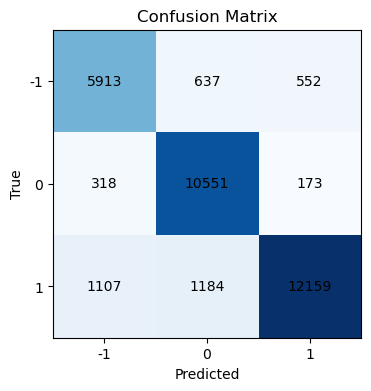

In [18]:
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()


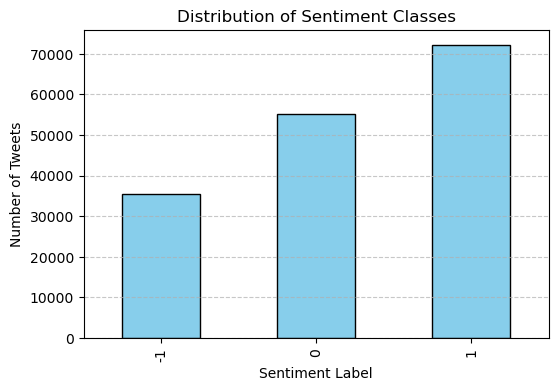

In [20]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6,4))
data['category'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
